In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.linear_model import LinearRegression #untuk buat prediksi linearRegression
from sklearn import metrics #untuk mengukur performa model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/Bahan port/Prediksi/Student score/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<ipython-input-8-f21a69dc9c29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hours'])


<Axes: xlabel='Hours', ylabel='Density'>

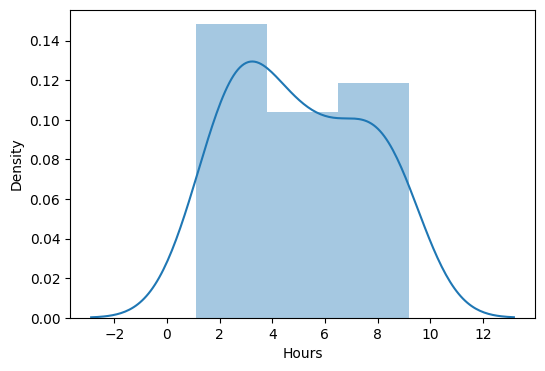

In [8]:
plt.figure(figsize=(6,4))
plt.tight_layout()
sns.distplot(df['Hours'])

<ipython-input-9-5c89fe239158>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Scores'])


<Axes: xlabel='Scores', ylabel='Density'>

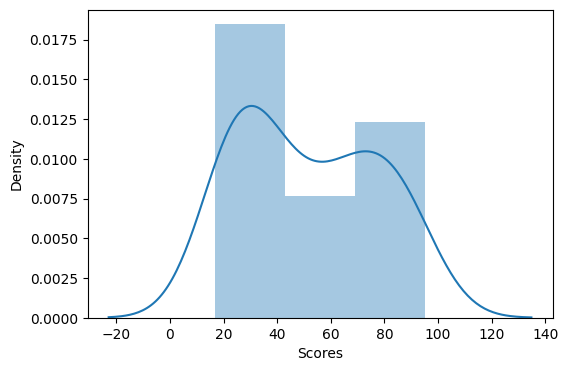

In [9]:
plt.figure(figsize=(6,4))
plt.tight_layout()
sns.distplot(df['Scores'])

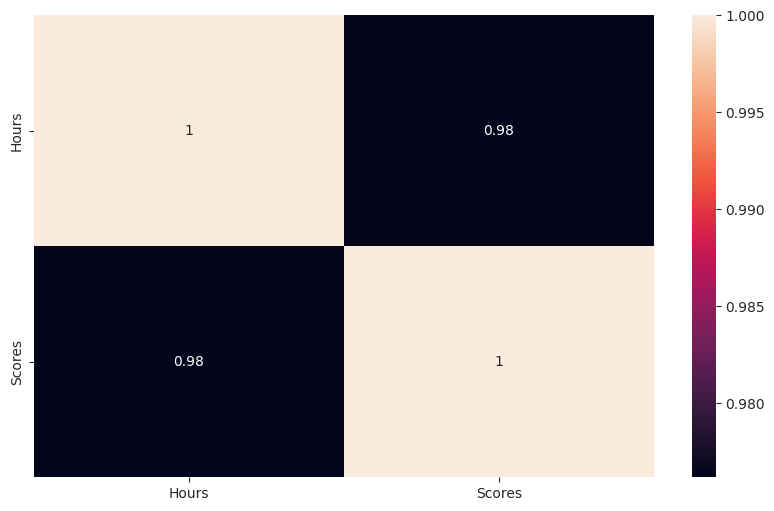

In [10]:
corr_data = df.corr()
plt.figure(figsize=(10,6))
sns.set_style('ticks')

sns.heatmap(corr_data,annot=True)
plt.show()

<Axes: >

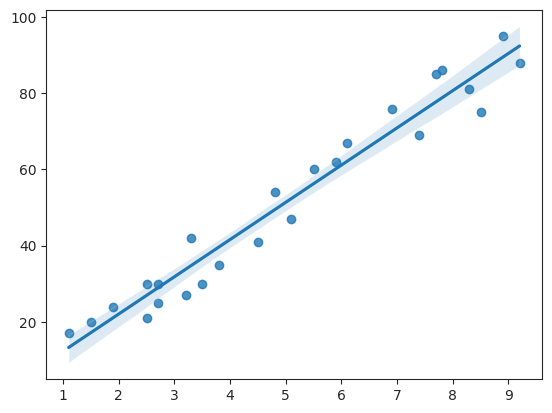

In [11]:
x = df[['Hours']].values
y = df[['Scores']].values
sns.regplot(x = x, y = y)

In [12]:
#Splitting x dan y
X = df[['Hours']].values
y = df[['Scores']].values
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [13]:
regressor.coef_[0]

array([9.77580339])

In [14]:
regressor.intercept_[0]

2.48367340537321

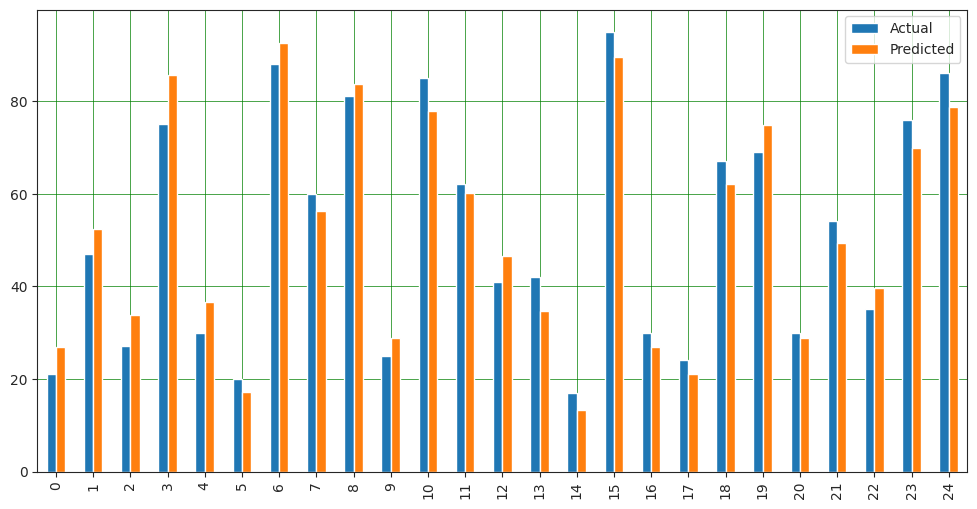

In [15]:
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(12, 6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2 Score:', round(metrics.r2_score(y, y_pred), 2))

Mean Absolute Error(MAE):  4.972805319866375
Mean Squared Error(MSE):  28.882730509245466
Root Mean Squared Error(RMSE):  5.374265578592619
R2 Score: 0.95
